<a href="https://colab.research.google.com/github/MahmoudMadi77/DataScience_U23103334/blob/main/Activity3_questions_u23103334.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = blue size = 6> **Activity #3 (5 marks)**


<font color = green size = 5> **Activity: Air Quality Analysis in NYC**

# Objective:
- **Objective:**  
The goal of this assignment is to analyze air quality data collected from low-cost sensors mounted on moving vehicles in New York City. Using the concepts learned in the chapters on Sampling and Empirical Distributions , Testing Hypotheses , and Estimation , you will perform statistical analysis to estimate pollution levels, test hypotheses about differences in pollution across neighborhoods, and construct confidence intervals for key parameters.

You are provided with a `Datascience` `Table` named `joined_table`, which contains air quality readings (`pm10`) and their corresponding administrative divisions (neighborhoods) in NYC. The table has been preprocessed and joined with neighborhood boundaries using geospatial operations. Your task is to perform all subsequent tasks using the `Datascience` Table abstraction as taught in class.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [1]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [4]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [5]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [6]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-6-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [7]:
#merged_data.dtypes

In [8]:
pollution_data = merged_data[['pm10','neighborhood']]

In [9]:
pollution_data.shape[0]

118495

In [10]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [11]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [12]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [13]:
pollution_data['pm10'].min()

0.0

In [14]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [15]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [16]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook.total of 5 marks . Use the Table abstraction.

# Tasks

## <font color = blue size  = 5>**Task 1: Sampling and Empirical Distribution (1 Mark)**

**Task Description:**

- Randomly sample 10% of the rows from the joined_table without replacement.
- Compute the mean pm10 value for this sample.
- Create an empirical histogram of the pm10 values from the sampled data using 10 bins.
- Comment on the shape of the histogram and compare it to the distribution of the full dataset.

<font color = red size= 5> attention</font>

remove pm10 values that are unreasonably high (above 300 µg/m³)

In [17]:
joined_table = joined_table.where('pm10', are.below(300))

In [18]:
len(joined_table)

2

In [19]:
joined_table.num_rows

117356

In [162]:
sample = joined_table.sample(k=int(joined_table.num_rows * 0.1), with_replacement=False)

In [21]:
fulldata_mean_pm10 = np.mean(joined_table.column('pm10'))
print("full data: PM10 Mean: " + str(fulldata_mean_pm10))

full data: PM10 Mean: 16.1723197791


In [22]:
mean_pm10 = np.mean(sample.column('pm10'))
print("Sample: PM10 Mean: " + str(mean_pm10))

Sample: PM10 Mean: 16.2330583724


Text(0.5, 1.0, 'PM10 (sample)')

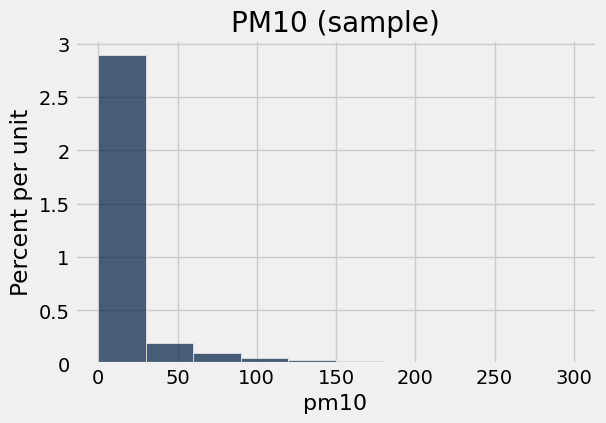

In [23]:
sample.select('pm10').hist(bins=10)
plt.title('PM10 (sample)')

Text(0.5, 1.0, 'PM10 (full dataset)')

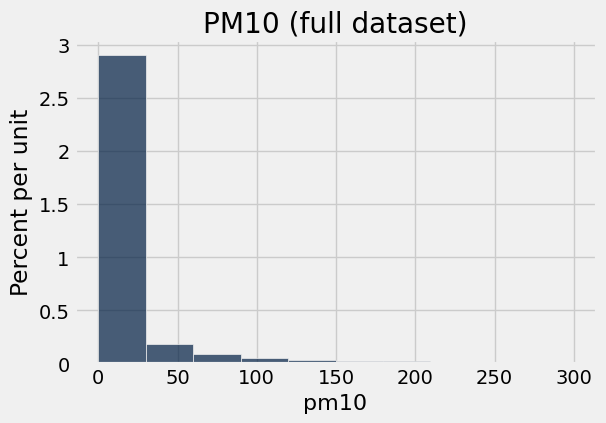

In [24]:
joined_table.select('pm10').hist(bins=10)
plt.title('PM10 (full dataset)')

# **Comment:** they both looks similar meand the sample is representative of the original data

## <font color = blue size  = 5> **Task 2: Estimation and Confidence Intervals (1 Mark)**


**Task Description:**
- Use the bootstrap method to estimate the median pm10 value for the entire dataset.
- Generate 5,000 bootstrap samples and compute the median for each sample.
- Construct a 95% confidence interval for the population median using the 2.5th and 97.5th percentiles of the bootstrapped medians.
- Visualize the results by drawing an `empirical histogram` of the bootstrapped medians and overlaying the confidence interval on the horizontal axis.
- Report the confidence interval and interpret what it means in the context of air quality.

In [25]:
pm10_values = joined_table.column('pm10')

In [26]:
n_bootstraps = 5000
medians = []

for _ in range(n_bootstraps):
    resample = sample.sample(with_replacement=True)
    medians.append(percentile(50,resample.column('pm10')))

In [27]:
boot_table = Table().with_column("Bootstrapped Median PM10", medians)

In [28]:
lower = percentile(2.5, boot_table.column("Bootstrapped Median PM10"))
upper = percentile(97.5, boot_table.column("Bootstrapped Median PM10"))

In [29]:
print('95% Confidence Interval for median PM10: [',lower,',',upper,']')

95% Confidence Interval for median PM10: [ 3.03 , 3.3 ]


In [30]:
fulldata_median = np.median(pm10_values)
print("Full Data Median: " + str(fulldata_median))

Full Data Median: 3.14


In [34]:
median_bins=np.arange(2.90, 3.45, 0.02)

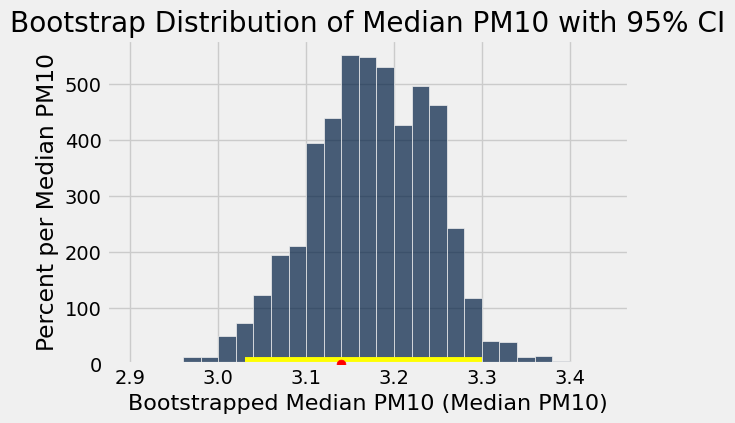

In [35]:
boot_table.hist("Bootstrapped Median PM10", bins=median_bins, unit="Median PM10")
plt.plot([lower, upper], [0, 0], color='yellow', lw=10, zorder=1)
plt.scatter(fulldata_median, 0, color='red', s=40, zorder=100)
plt.title("Bootstrap Distribution of Median PM10 with 95% CI")

plt.grid(True)

# **Comment:** it means that 95% of the data sample falls into the interval

## <font color = blue size  = 5> **Task 3: Hypothesis Testing Using Confidence Intervals (1.5 Mark)**

**Task Description:**
- Test the hypothesis about the average <font color = red size =5> `pm10` </font> level in the population using confidence intervals.
  - Null Hypothesis (H0): The average pm10 level in the population is `20 μg/m³` .
  - Alternative Hypothesis (Ha): The average pm10 level in the population is not `20 μg/m³` .
- Use the confidence interval method to test this hypothesis:
Construct a 95% confidence interval for the average `pm10` level in the population.
  - If the confidence interval contains `20 μg/m³` , conclude that there is no significant difference from `20 μg/m³` (fail to reject H0).
  - Otherwise, conclude that there is a significant difference (reject H0).
- Interpret your results and explain whether the data supports the null hypothesis or the alternative hypothesis.

In [36]:
n_bootstraps = 5000
boot_means = []

for _ in range(n_bootstraps):
    resample = sample.sample(with_replacement=True)
    boot_means.append(np.mean(resample.column('pm10')))


In [37]:
boot_table = Table().with_column("Bootstrapped Mean PM10", boot_means)

In [38]:
lower = percentile(2.5, boot_table.column("Bootstrapped Mean PM10"))
upper = percentile(97.5, boot_table.column("Bootstrapped Mean PM10"))

In [39]:
print('95% Confidence Interval for mean PM10: [',lower,',',upper,']')

95% Confidence Interval for mean PM10: [ 15.5804814657 , 16.8893020878 ]


In [40]:
if 20 >= lower and 20 <= upper:
    print("Data Supports the null hypothesis: There is no significant difference from 20 μg/m³.")
else:
    print("Data Supports the alternative hypothesis: There is a significant difference from 20 μg/m³.")


Data Supports the alternative hypothesis: There is a significant difference from 20 μg/m³.


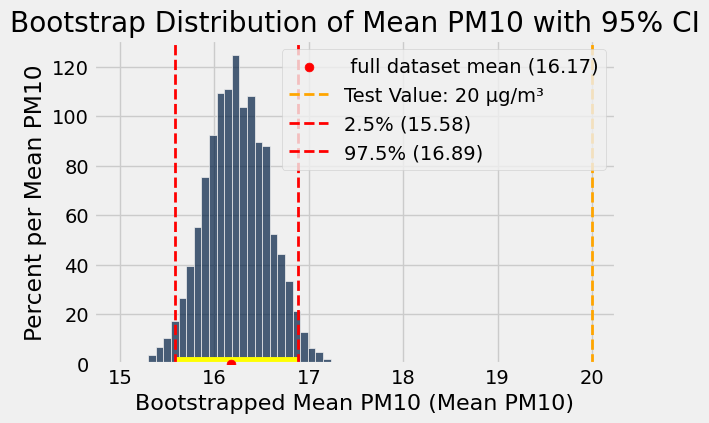

In [48]:
boot_table.hist("Bootstrapped Mean PM10", bins=30, unit="Mean PM10")
plt.plot([lower, upper], [0, 0], color='yellow', lw=10, zorder=1)
plt.scatter(fulldata_mean_pm10, 0, color='red', s=40, zorder=100,label=f' full dataset mean ({fulldata_mean_pm10:.2f})')
plt.axvline(20, color='orange', linestyle='--', linewidth=2, label='Test Value: 20 μg/m³')
plt.axvline(lower, color='red', linestyle='--', linewidth=2, label=f'2.5% ({lower:.2f})')
plt.axvline(upper, color='red', linestyle='--', linewidth=2, label=f'97.5% ({upper:.2f})')
plt.title("Bootstrap Distribution of Mean PM10 with 95% CI")
plt.legend()
plt.grid(True)
plt.show()


 # There is a significant difference (**rejecting H0**) and the data supports **alternative hypothesis**

## <font color = blue size  = 5> **Task 4: Percentiles and Extreme Values (1.5 Mark)**


- Use the bootstrap method to simulate the mean `pm10` levels for each neighborhood. Generate 5,000 bootstrap samples for the top 3 neighborhoods with the highest mean pm10 levels.
- Create an empirical histogram for each of these neighborhoods, showing the distribution of the bootstrapped means.
- Overlay horizontal yellow lines to indicate the 95% confidence interval for the mean pm10 level in each neighborhood.


In [232]:
sample = joined_table.sample(k=int(joined_table.num_rows * 0.1), with_replacement=False)

In [233]:
# Step 1: Find the top 3 neighborhoods with highest mean PM10
neighborhood_means = sample.group('neighborhood', np.mean)  # Group and find mean
top3_neighborhoods = neighborhood_means.sort('pm10 mean', descending=True).take(np.arange(3))
top3_names = top3_neighborhoods.column('neighborhood')

print('Top 3 neighborhoods with highest mean PM10:')
print(top3_names)

Top 3 neighborhoods with highest mean PM10:
['Crotona Park' 'Concourse Village' 'Pelham Gardens']


In [234]:
# For each of the top 3 neighborhoods, print the number of rows
for neighborhood in top3_names:

    neighborhood_data = sample.where('neighborhood', neighborhood)

    print('Neighborhood:', neighborhood)
    print('Number of rows:', neighborhood_data.num_rows)


Neighborhood: Crotona Park
Number of rows: 6
---
Neighborhood: Concourse Village
Number of rows: 7
---
Neighborhood: Pelham Gardens
Number of rows: 12
---


In [235]:
top3_neighborhoods

neighborhood,pm10 mean
Crotona Park,67.1033
Concourse Village,65.1571
Pelham Gardens,57.9083


In [236]:
sample.where('neighborhood', 'Crotona Park')

pm10,neighborhood
1.5,Belmont
19.92,Belmont
119.4,Belmont
8.49,Belmont
3.12,Belmont
78.65,Belmont
0.12,Belmont
0.12,Belmont
3.02,Belmont
40.55,Belmont


In [239]:
sample.where('neighborhood', 'Concourse Village')

pm10,neighborhood
13.42,Concourse Village
5.63,Concourse Village
42.97,Concourse Village
0.41,Concourse Village
149.13,Concourse Village
244.29,Concourse Village
0.25,Concourse Village


In [240]:
sample.where('neighborhood', 'Pelham Gardens')

pm10,neighborhood
52.73,Pelham Gardens
2.97,Pelham Gardens
221.41,Pelham Gardens
3.12,Pelham Gardens
121.22,Pelham Gardens
111.5,Pelham Gardens
2.23,Pelham Gardens
50.41,Pelham Gardens
118.86,Pelham Gardens
0.87,Pelham Gardens


95% Confidence Interval for mean PM10 in Crotona Park : (27.395, 110.67333333333333)
95% Confidence Interval for mean PM10 in Concourse Village : (8.3028571428571425, 135.98432142857123)
95% Confidence Interval for mean PM10 in Pelham Gardens : (23.198395833333333, 99.714479166666635)


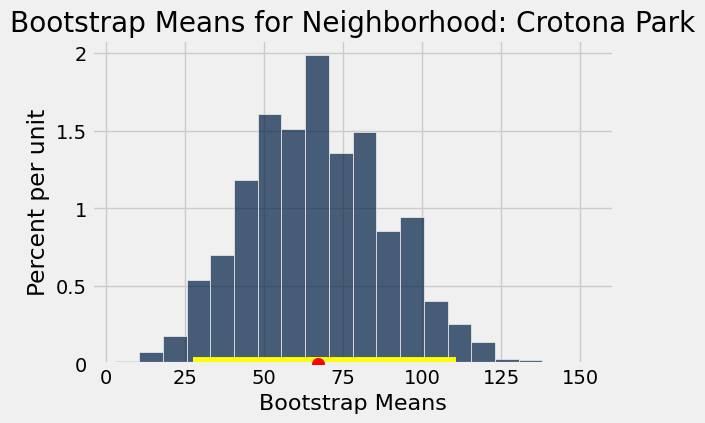

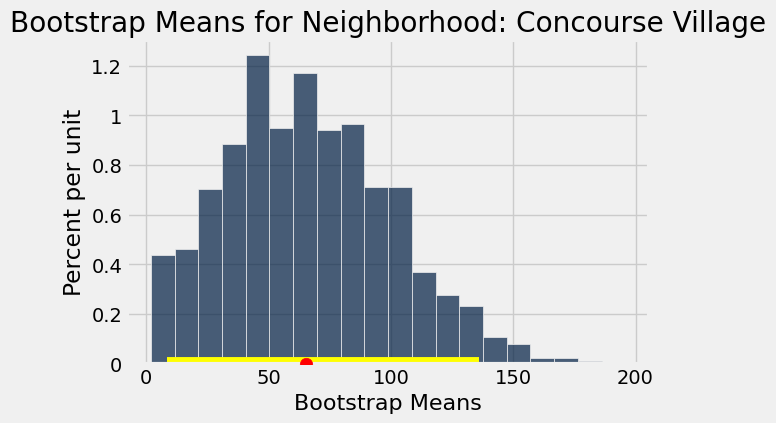

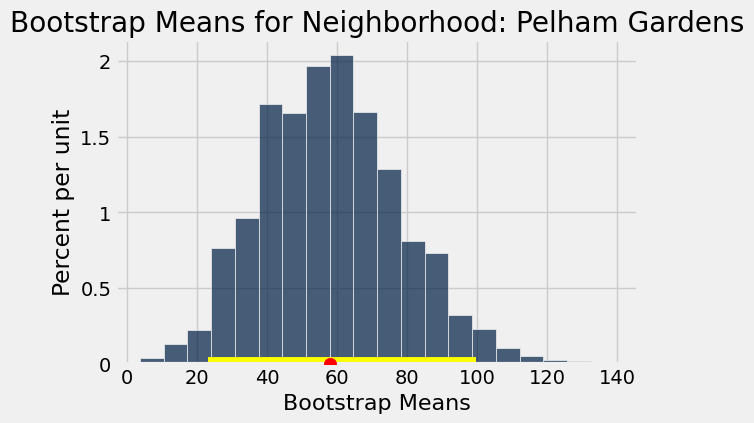

In [245]:
for neighborhood in top3_names:

    neighborhood_data = sample.where('neighborhood', neighborhood)

    bootstrap_means = make_array()
    # Bootstrap 5,000 times
    for i in np.arange(5000):
        resampled = neighborhood_data.sample(with_replacement=True)
        sample_mean = np.mean(resampled.column('pm10'))
        bootstrap_means = np.append(bootstrap_means, sample_mean)

    bootstrap_table = Table().with_column('Bootstrap Means', bootstrap_means)

    bootstrap_table.hist('Bootstrap Means', bins=20)
    plt.title('Bootstrap Means for Neighborhood: ' + neighborhood)

    lower_bound = np.percentile(bootstrap_means, 2.5)
    upper_bound = np.percentile(bootstrap_means, 97.5)

    true_mean = np.mean(neighborhood_data.column('pm10'))

    plt.plot([lower_bound, upper_bound], [0, 0], color='yellow', lw=10, zorder=1)
    plt.scatter(true_mean, 0, color='red', s=80, zorder=10);

    print('95% Confidence Interval for mean PM10 in', neighborhood, ':', (lower_bound, upper_bound))

# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 10, 11, and 13, for guidance on Sampling and Empirical Distributions, Testing Hypotheses,  and Estimation.
- Test your code frequently to ensure it runs without errors.